
## Image Classification: Jaguar vs Leopard

This image classifier will attempt to accurately distinguish between jaguars and leopards. The dataset contains 50 images of jaguars and 50 images of leopards.


In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
from fastai import *
from fastai.vision import *

In [13]:
bs = 16

Download and extract the [jaguar_vs_leopard.zip](https://github.com/edkahara/fastai/blob/master/lesson 2/datasets/jaguar_vs_leopard.zip) dataset file on the same directory as this notebook.

In [14]:
path = Path('./jaguar_vs_leopard')
path.ls()

[PosixPath('jaguar_vs_leopard/leopard'), PosixPath('jaguar_vs_leopard/jaguar')]

In [15]:
np.random.seed(12)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=bs, num_workers=0).normalize(imagenet_stats)

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['jaguar', 'leopard'], 2, 80, 20)

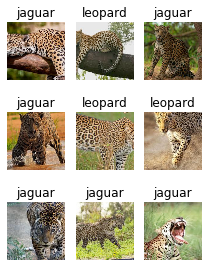

In [17]:
data.show_batch(rows=3, figsize=(3,4))

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.231820,0.394233,0.200000,00:23
1,0.794462,0.302354,0.100000,00:23
2,0.629904,0.379011,0.150000,00:24
3,0.505943,0.387599,0.100000,00:24


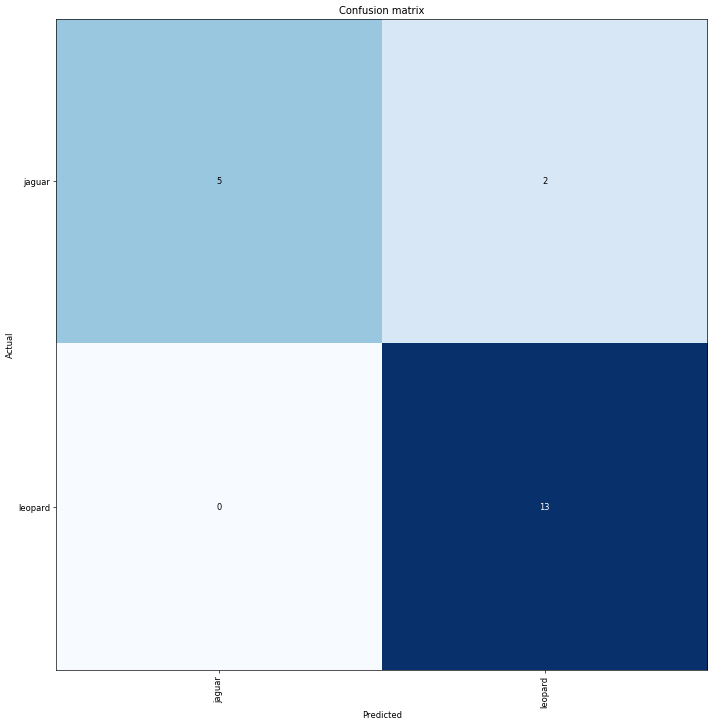

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


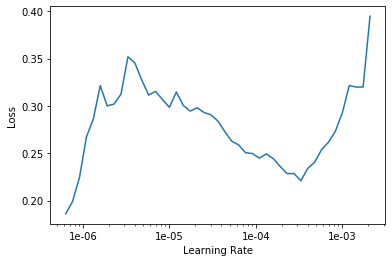

In [22]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.447690,0.221055,0.100000,00:32
1,0.386737,0.114783,0.050000,00:33


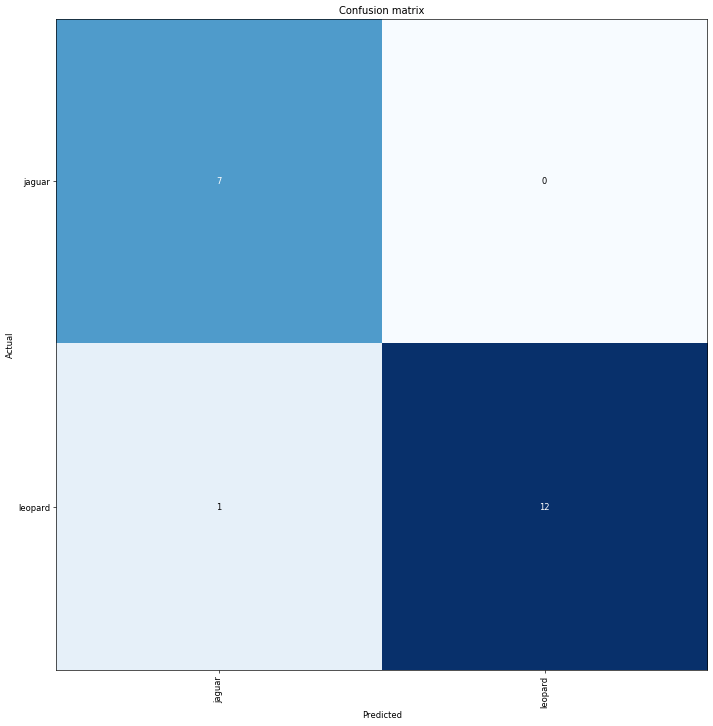

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [26]:
learn.export()

In [28]:
learn = load_learner(path)

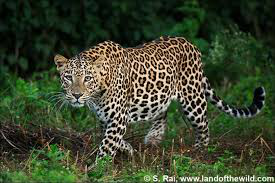

In [29]:
img = open_image(path/'leopard'/'Z.jpg')
img

In [30]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)

leopard


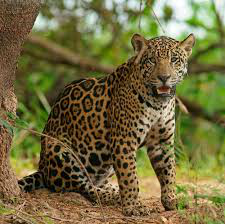

In [31]:
img2 = open_image(path/'jaguar'/'Z.jpg')
img2

In [32]:
pred_class,pred_idx,outputs = learn.predict(img2)
print(pred_class)

jaguar
